Saving research.csv to research.csv
First 5 rows of the dataset:

                   Variable       Breakdown  \
0  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
1  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
2  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
3  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
4  _01_Total_RD_Expenditure  ANZSIC_1_Digit   

                    Breakdown_category  Year RD_Value Status  \
0  A_Agriculture, Forestry and Fishing  2016       91    NaN   
1  A_Agriculture, Forestry and Fishing  2018       89    NaN   
2  A_Agriculture, Forestry and Fishing  2019      ...    NaN   
3  A_Agriculture, Forestry and Fishing  2020       99    NaN   
4  A_Agriculture, Forestry and Fishing  2021      ...    NaN   

                    Unit Footnotes Relative_Sampling_Error  
0  NZ Dollars (millions)        12                    23.8  
1  NZ Dollars (millions)        12                    51.7  
2  NZ Dollars (millions)        12                     ...  
3  NZ Dollars (million

/tmp/ipython-input-1-514721693.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Relative_Sampling_Error'].fillna(df['Relative_Sampling_Error'].median(), inplace=True)
/tmp/ipython-input-1-514721693.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Relative_Sampling_Error'].fillna(df['Relative_Sampling_Error'].median(), inplace=T

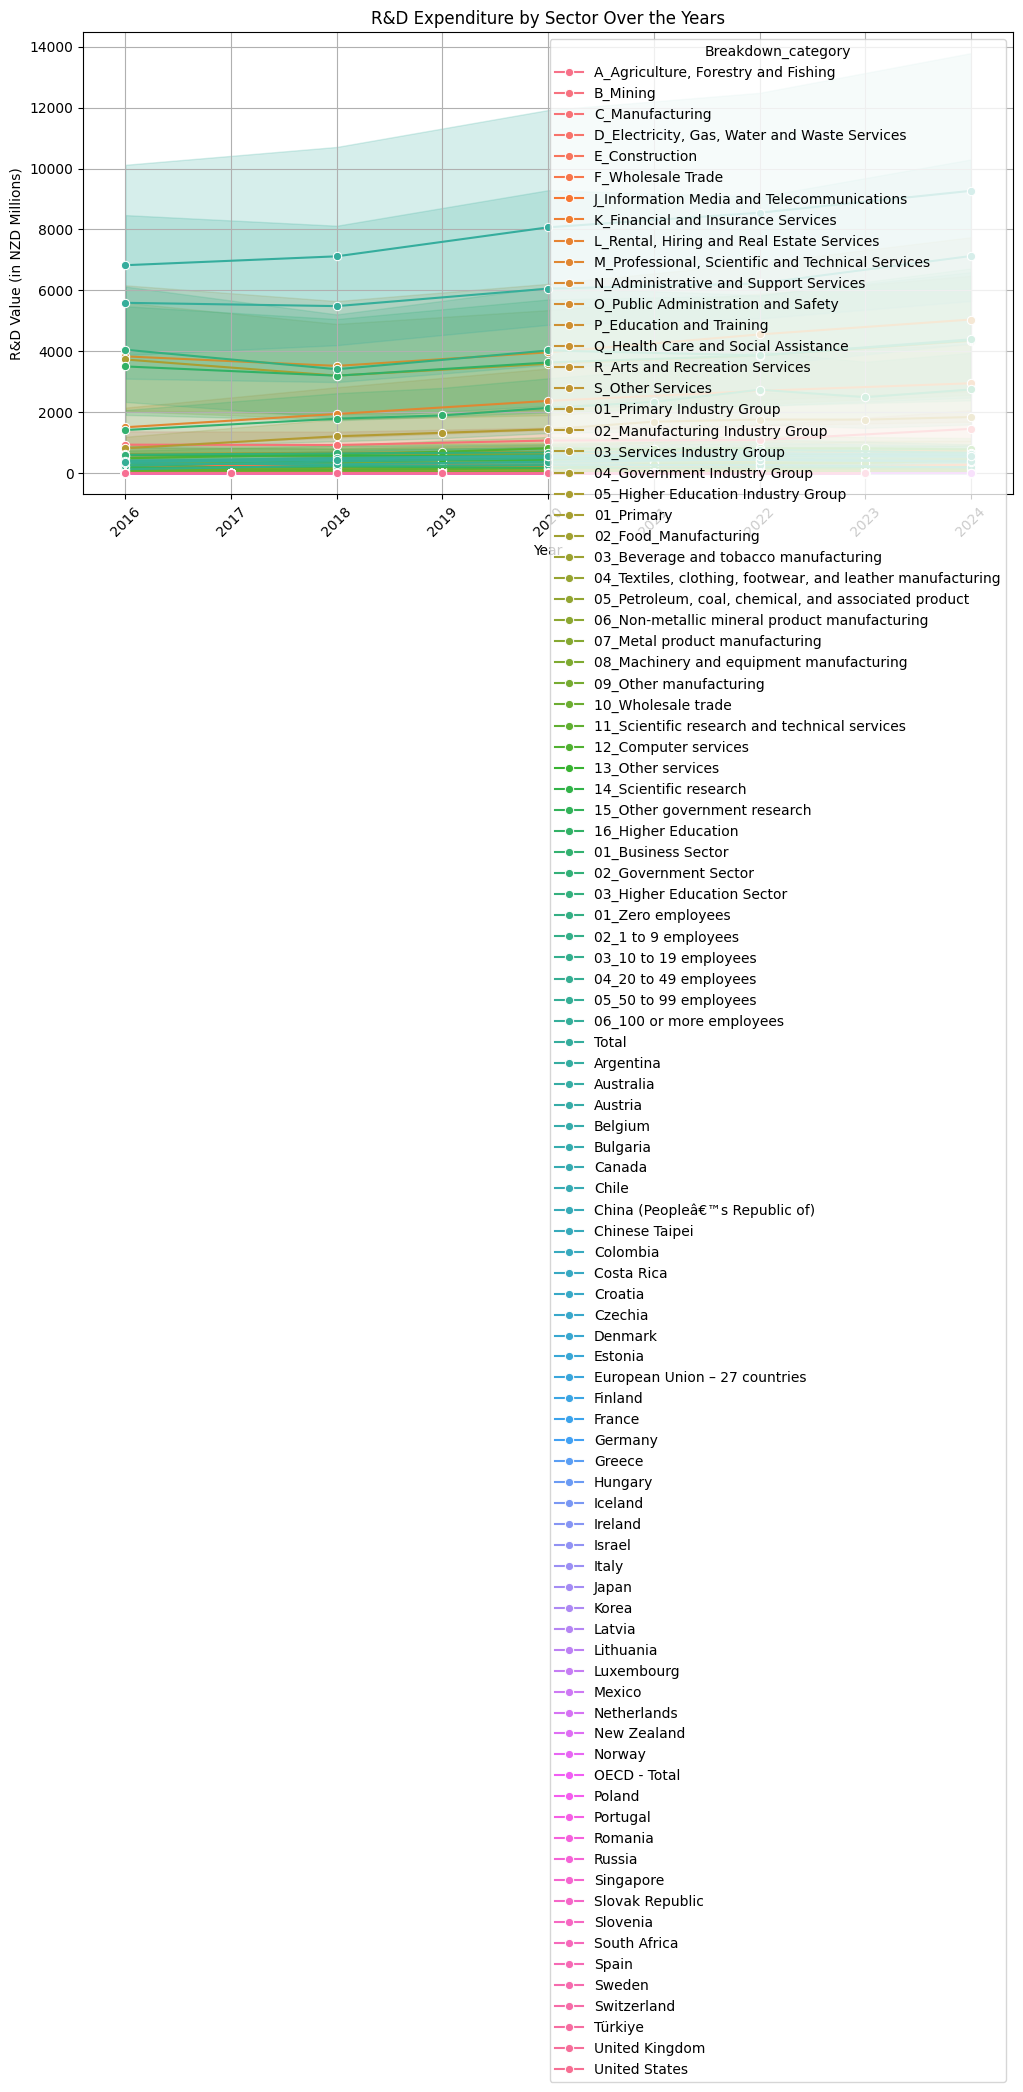

ValueError: could not convert string to float: '_01_Total_RD_Expenditure'

<Figure size 800x500 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("research.csv")

print("First 5 rows of the dataset:\n")
print(df.head())

print("\n\nDataset Info:\n")
print(df.info())

print("\n\nSummary Statistics:\n")
print(df.describe(include='all'))

print("\n\nMissing Values in Each Column:\n")
print(df.isnull().sum())

df['RD_Value'] = pd.to_numeric(df['RD_Value'], errors='coerce')
df['Relative_Sampling_Error'] = pd.to_numeric(df['Relative_Sampling_Error'], errors='coerce')

df = df.dropna(subset=['RD_Value'])

df['Relative_Sampling_Error'].fillna(df['Relative_Sampling_Error'].median(), inplace=True)

df.drop(columns=['Status', 'Footnotes'], inplace=True)

print("\n\nAfter Cleaning - Missing Values:\n")
print(df.isnull().sum())

df_encoded = df.copy()
df_encoded['Breakdown_category'] = df_encoded['Breakdown_category'].astype('category').cat.codes

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='RD_Value', hue='Breakdown_category', marker="o")
plt.title("R&D Expenditure by Sector Over the Years")
plt.xticks(rotation=45)
plt.ylabel("R&D Value (in NZD Millions)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
